<a href="https://colab.research.google.com/github/sandratreneska/FLAME-fire-detection/blob/main/Evaluate_FLAME_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import time
import pickle
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
IMG_HEIGHT = 254 
IMG_WIDTH = 254 
BATCH_SIZE = 64

In [ ]:
# Load saved models

models_toptrained = {
  #"vgg16_toptrained": keras.models.load_model('/content/drive/My Drive/toptrained_vgg16_model'),
	#"vgg19_toptrained": keras.models.load_model('/content/drive/My Drive/toptrained_vgg19_model'),
	#"inception_toptrained": keras.models.load_model('/content/drive/My Drive/toptrained_inception_model'),
	#"xception_toptrained": keras.models.load_model('/content/drive/My Drive/toptrained_xception_model'), 
	"resnet50_toptrained": keras.models.load_model('/content/drive/My Drive/toptrained_resnet50_model')
}
models_finetuned = {
  #"vgg16_finetuned": keras.models.load_model('/content/drive/My Drive/finetuned_vgg16_model'),
	#"vgg19_finetuned": keras.models.load_model('/content/drive/My Drive/finetuned_vgg19_model'),
	#"inception_finetuned": keras.models.load_model('/content/drive/My Drive/finetuned_inception_model'),
	#"xception_finetuned": keras.models.load_model('/content/drive/My Drive/finetuned_xception_model'), 
	"resnet50_finetuned": keras.models.load_model('/content/drive/My Drive/finetuned_resnet50_model')
}

In [ ]:
# Load models' history

history_toptrained = {
  #"vgg16_toptrained": pickle.load(open('/content/drive/My Drive/trainHistoryDict/toptrained_vgg16_history', "rb")),
	#"vgg19_toptrained": pickle.load(open('/content/drive/My Drive/trainHistoryDict/toptrained_vgg19_history', "rb")),
	#"inception_toptrained": pickle.load(open('/content/drive/My Drive/trainHistoryDict/toptrained_inception_history', "rb")),
	#"xception_toptrained": pickle.load(open('/content/drive/My Drive/trainHistoryDict/toptrained_xception_history', "rb")), 
	"resnet50_toptrained": pickle.load(open('/content/drive/My Drive/trainHistoryDict/toptrained_resnet50_history', "rb"))
}
history_finetuned = {
  #"vgg16_finetuned": pickle.load(open('/content/drive/My Drive/trainHistoryDict/toptrained_vgg16_history', "rb")),
	#"vgg19_finetuned": pickle.load(open('/content/drive/My Drive/trainHistoryDict/toptrained_vgg19_history', "rb")),
	#"inception_finetuned": pickle.load(open('/content/drive/My Drive/trainHistoryDict/toptrained_inception_history', "rb")),
	#"xception_finetuned": pickle.load(open('/content/drive/My Drive/trainHistoryDict/toptrained_xception_history', "rb")), 
	"resnet50_finetuned": pickle.load(open('/content/drive/My Drive/trainHistoryDict/toptrained_resnet50_history', "rb"))
}

In [ ]:
MODEL_PREPROCESS = {
  #"vgg16": tf.keras.applications.vgg16.preprocess_input,
	#"vgg19": tf.keras.applications.vgg19.preprocess_input,
	#"inception": tf.keras.applications.inception_v3.preprocess_input,
	#"xception": tf.keras.applications.xception.preprocess_input, 
	"resnet50": tf.keras.applications.resnet50.preprocess_input
}

In [ ]:
# Test dir
TEST_DIR = "/content/drive/My Drive/FLAME_dataset/Test"

In [ ]:
# Evaluate models

# Iterate top trained models
for (name, model), chosen_preprocess in zip(models_toptrained.items(), MODEL_PREPROCESS.values()):

  # Create test set
  testdatagen = ImageDataGenerator(
      data_format="channels_last",
      dtype=tf.float32,
      preprocessing_function=chosen_preprocess 
  )

  test_data_gen = testdatagen.flow_from_directory(
      directory=TEST_DIR,
      target_size=(IMG_HEIGHT, IMG_WIDTH),
      batch_size=BATCH_SIZE,
      color_mode="rgb",
      class_mode="binary",
      shuffle=False,
      seed=123,
  )

  start_time = time.time()
  print("Model:", name)
  print("Evaluate on test data")
  results = model.evaluate(test_data_gen)
  print("Test loss, Test acc:", results)
  print("--- %s seconds ---" % (time.time() - start_time))
  print("-----------------------------------------------")

# Iterate fine tuned models
for (name, model), chosen_preprocess in zip(models_finetuned.items(), MODEL_PREPROCESS.values()):

  # Create test set
  testdatagen = ImageDataGenerator(
      data_format="channels_last",
      dtype=tf.float32,
      preprocessing_function=chosen_preprocess 
  )

  test_data_gen = testdatagen.flow_from_directory(
      directory=TEST_DIR,
      target_size=(IMG_HEIGHT, IMG_WIDTH),
      batch_size=BATCH_SIZE,
      color_mode="rgb",
      class_mode="binary",
      shuffle=False,
      seed=123,
  )

  start_time = time.time()
  print("Model:", name)
  print("Evaluate on test data")
  results = model.evaluate(test_data_gen)
  print("Test loss, Test acc:", results)
  print("--- %s seconds ---" % (time.time() - start_time))
  print("-----------------------------------------------")

Found 8617 images belonging to 2 classes.
Model: resnet50_toptrained
Evaluate on test data
135/135 [==============================] - 2281s 17s/step - loss: 1.1007 - accuracy: 0.6611
Test loss, Test acc: [1.100712537765503, 0.6611349582672119]
--- 2298.417030096054 seconds ---
-----------------------------------------------
Found 8617 images belonging to 2 classes.
Model: resnet50_finetuned
Evaluate on test data
135/135 [==============================] - 1681s 12s/step - loss: 1.3074 - accuracy: 0.8801
Test loss, Test acc: [1.3074456453323364, 0.8801206946372986]
--- 1681.698319196701 seconds ---
-----------------------------------------------


Model: resnet50_toptrained


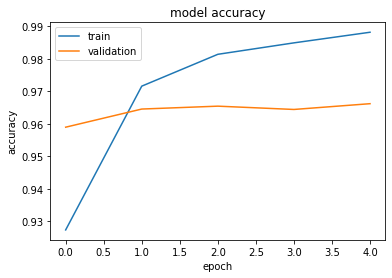

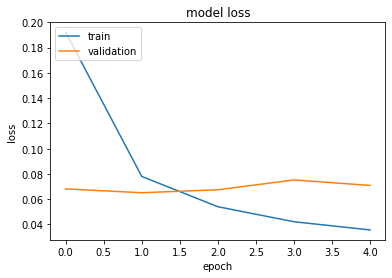

Model: resnet50_finetuned


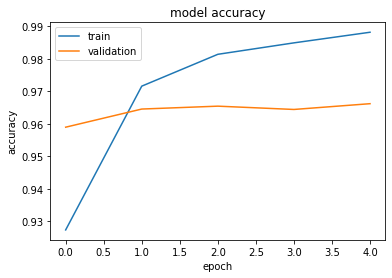

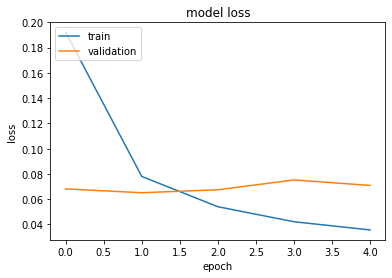

In [ ]:
# Plot training and validation accuracies and losses
for name, history in history_toptrained.items():

  print("Model:", name)
  # summarize history for accuracy
  plt.plot(history['accuracy'])
  plt.plot(history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()

  # summarize history for loss
  plt.plot(history['loss'])
  plt.plot(history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()

for name, history in history_finetuned.items():

  print("Model:", name)
  # summarize history for accuracy
  plt.plot(history['accuracy'])
  plt.plot(history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()

  # summarize history for loss
  plt.plot(history['loss'])
  plt.plot(history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()

In [ ]:
# Accuracies on one plot